In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import plotly.io as pio
pio.renderers.default='notebook'

In [2]:
tripdata = pd.read_csv("../dataset/complete_bike_sharing.csv")
tripdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353897 entries, 0 to 353896
Data columns (total 40 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   tripduration             353897 non-null  int64  
 1   start station id         353897 non-null  int64  
 2   start station name       353897 non-null  object 
 3   start station latitude   353897 non-null  float64
 4   start station longitude  353897 non-null  float64
 5   end station id           353897 non-null  int64  
 6   end station name         353897 non-null  object 
 7   end station latitude     353897 non-null  float64
 8   end station longitude    353897 non-null  float64
 9   bikeid                   353897 non-null  int64  
 10  usertype                 353897 non-null  object 
 11  birth year               353897 non-null  int64  
 12  hour                     353897 non-null  int64  
 13  min                      353897 non-null  int64  
 14  temp

In [5]:
tripdata.columns

Index(['tripduration', 'start station id', 'start station name',
       'start station latitude', 'start station longitude', 'end station id',
       'end station name', 'end station latitude', 'end station longitude',
       'bikeid', 'usertype', 'birth year', 'hour', 'min', 'temp', 'feelslike',
       'dew', 'humidity', 'precip', 'precipprob', 'snow', 'snowdepth',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'uvindex', 'conditions', 'date', 'dist', 'birthyear',
       'years_old', 'age_group', 'holiday', 'day', 'month', 'seasons',
       'gender_cat'],
      dtype='object')

In [6]:
tripdata.head()

,tripduration,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,...,date,dist,birthyear,years_old,age_group,holiday,day,month,seasons,gender_cat
0,932,3183,Exchange Place,40.716247,-74.033459,3199,Newport Pkwy,40.728745,-74.032108,31929,...,2018-01-01,1.084267,1992,26,20-29,Neujahr,Monday,January,winter,male
1,550,3183,Exchange Place,40.716247,-74.033459,3199,Newport Pkwy,40.728745,-74.032108,31845,...,2018-01-01,1.084267,1969,49,40-49,Neujahr,Monday,January,winter,female
2,510,3183,Exchange Place,40.716247,-74.033459,3199,Newport Pkwy,40.728745,-74.032108,31708,...,2018-01-01,1.084267,1946,72,65+,Neujahr,Monday,January,winter,male
3,354,3183,Exchange Place,40.716247,-74.033459,3267,Morris Canal,40.712419,-74.038526,31697,...,2018-01-01,0.415696,1994,24,20-29,Neujahr,Monday,January,winter,male
4,250,3183,Exchange Place,40.716247,-74.033459,3639,Harborside,40.719252,-74.034234,31861,...,2018-01-01,0.240932,1991,27,20-29,Neujahr,Monday,January,winter,male


## Data Exploration

In [7]:
User = pd.DataFrame()
User['avg_trip duration'] = round(tripdata.groupby('usertype')['tripduration'].mean())
User = User.reset_index()
User['usertype'] = User['usertype'].astype('object')
User
User

,usertype,avg_trip duration
0,Customer,3020.0
1,Subscriber,517.0


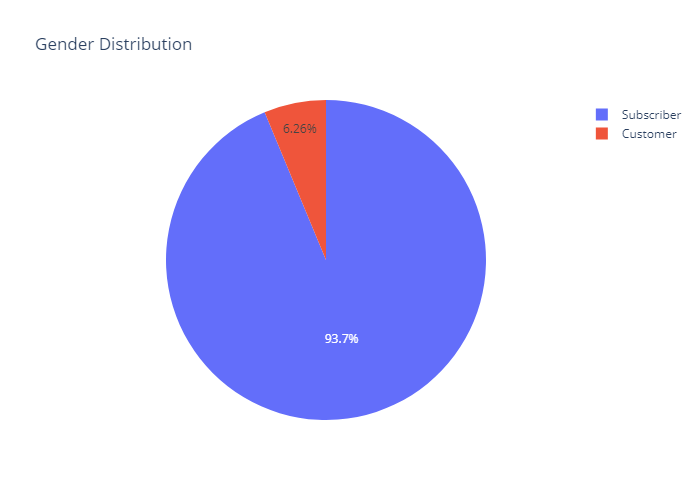

In [8]:
fig = px.pie(values = tripdata['usertype'].value_counts(),
       names = tripdata['usertype'].value_counts().index,
       title ="Gender Distribution")
fig.show("png")

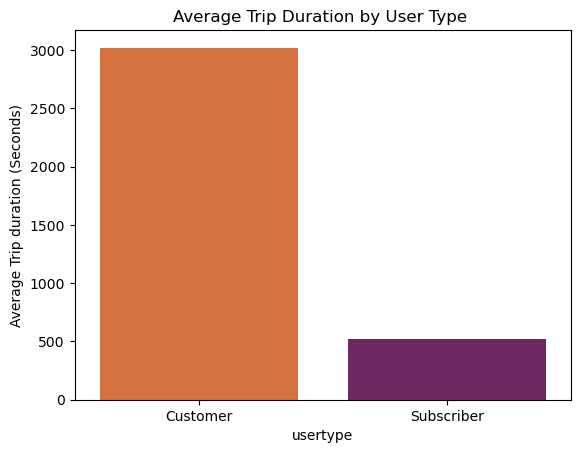

In [9]:
ax2 = sns.barplot('usertype', 'avg_trip duration', data = User,palette="inferno_r")
ax2.set_title('Average Trip Duration by User Type ')
ax2.set_ylabel('Average Trip duration (Seconds)')
plt.show()

we can say that average number of users are one time users or tourists 
compared to the subscribed users.

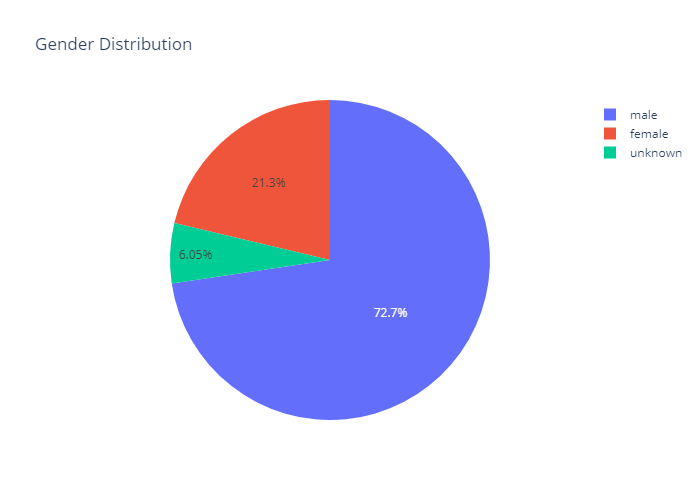

In [11]:
fig = px.pie(values = tripdata['gender_cat'].value_counts(),
       names = tripdata['gender_cat'].value_counts().index,
       title ="Gender Distribution")
fig.show("png")

#### Here labels are 1 : Male, 2 : Female, 0 : No_Gender
More number of male users than female and some people not gender identifiable.

In [ ]:
tripdata['birthyear'] = pd.to_numeric(tripdata['birth year'], downcast='integer')
tripdata['Years_old'] = tripdata['year'] - tripdata['birthyear'] 
Age_Groups = ["<20", "20-29", "30-39", "40-49", "50-59", "60-64","65+"]
Age_Groups_Limits = [0, 20, 30, 40, 50, 60, 65, np.inf]
Age_Min = 0
Age_Max = 100
tripdata["Age_group"] = pd.cut(tripdata["Years_old"], Age_Groups_Limits, labels=Age_Groups)

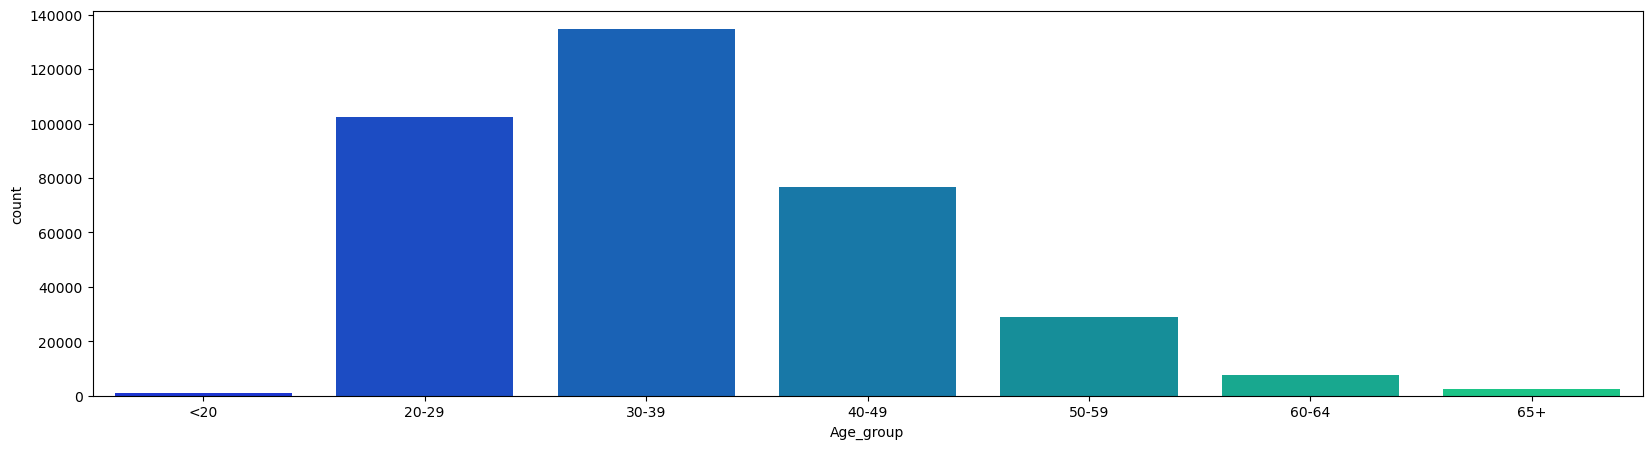

In [35]:
plt.figure(figsize = (20,5))
sns.countplot(tripdata["Age_group"],palette = "winter")
plt.show()

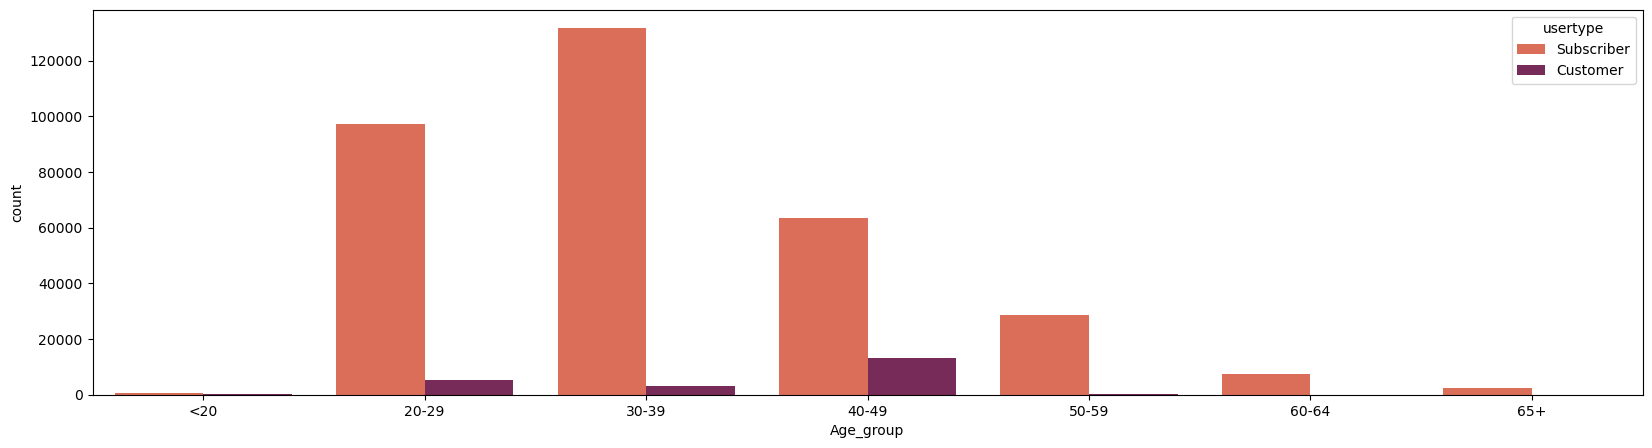

In [36]:
plt.figure(figsize = (20,5))
sns.countplot(tripdata["Age_group"],hue=tripdata["usertype"],palette="rocket_r")
plt.show()

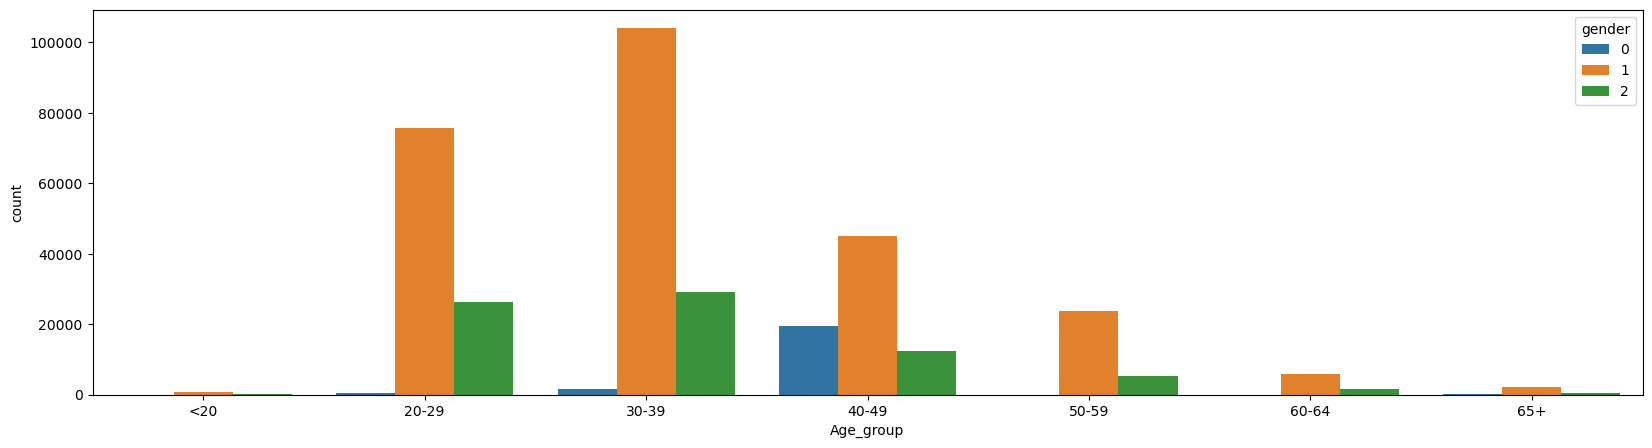

In [37]:
plt.figure(figsize = (20,5))
sns.countplot(tripdata["Age_group"],hue=tripdata["gender"])
plt.show()

We can conclude that age group between 30-39 of male users who are subscribed using more bike rides during working days.

### box plot for the age 

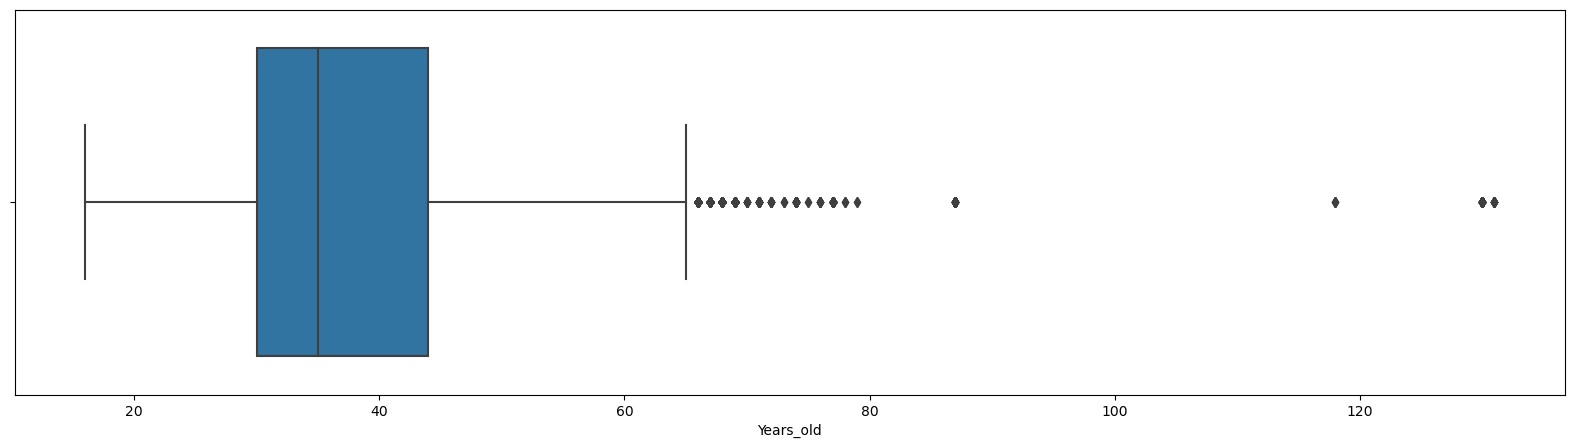

In [38]:
plt.figure(figsize = (20,5))
sns.boxplot(tripdata.Years_old)
plt.show()

In [39]:
tripdata["Years_old"].describe()

count    353892.000000
mean         37.612125
std          10.268528
min          16.000000
25%          30.000000
50%          35.000000
75%          44.000000
max         131.000000
Name: Years_old, dtype: float64

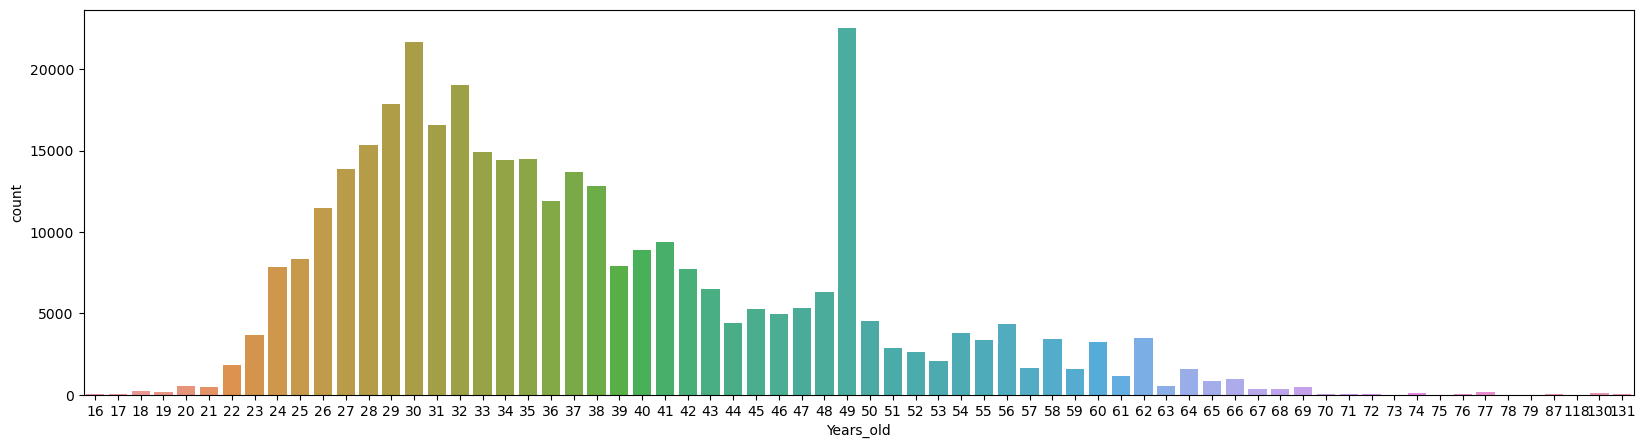

In [40]:
plt.figure(figsize = (20,5))
sns.countplot(tripdata["Years_old"])
plt.show()


People having age above 60yrs(approx) are the outliers for this dataset.

### Peak hours of the day for using bike

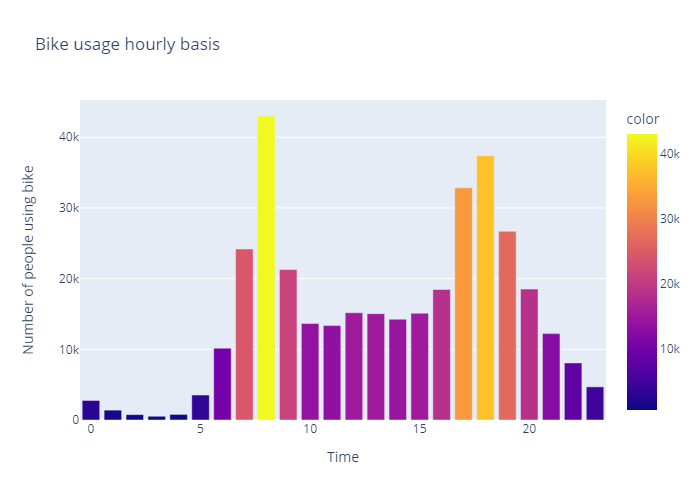

In [41]:
fig = px.bar(x=tripdata["start_hour"].value_counts().index,
       y=tripdata["start_hour"].value_counts().values,
       color=tripdata["start_hour"].value_counts().values,
       title = "Bike usage hourly basis",
       labels={'x':'Time',"y":"Number of people using bike"})
fig.show("png")

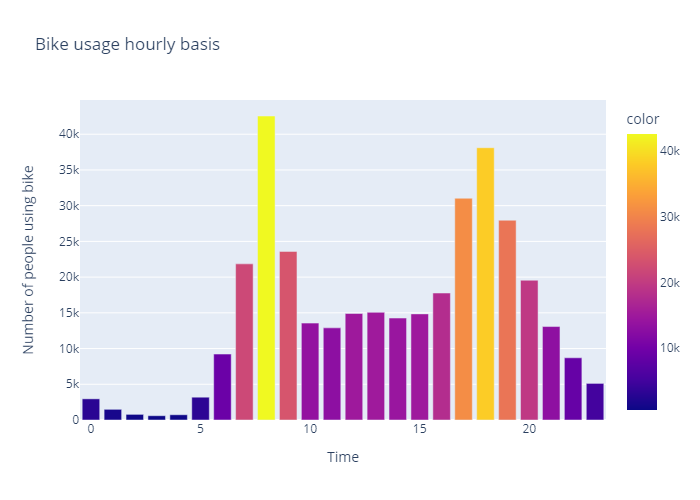

In [42]:
fig = px.bar(x=tripdata["end_hour"].value_counts().index,
       y=tripdata["end_hour"].value_counts().values,
       color=tripdata["end_hour"].value_counts().values,
       title = "Bike usage hourly basis",
       labels={'x':'Time',"y":"Number of people using bike"})
fig.show("png")

### peak day of the bike usage

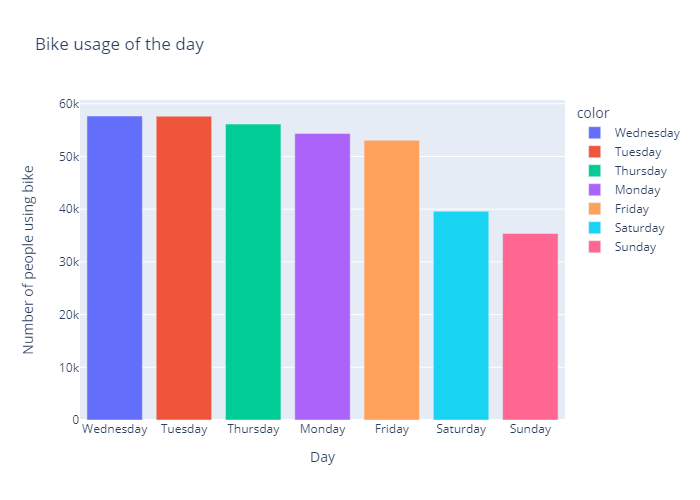

In [43]:
fig = px.bar(x=tripdata["start_day"].value_counts().index,
       y=tripdata["start_day"].value_counts().values,
       color=tripdata["start_day"].value_counts().index,
       title = "Bike usage of the day",
       labels={'x':'Day',"y":"Number of people using bike"})
fig.show("png")

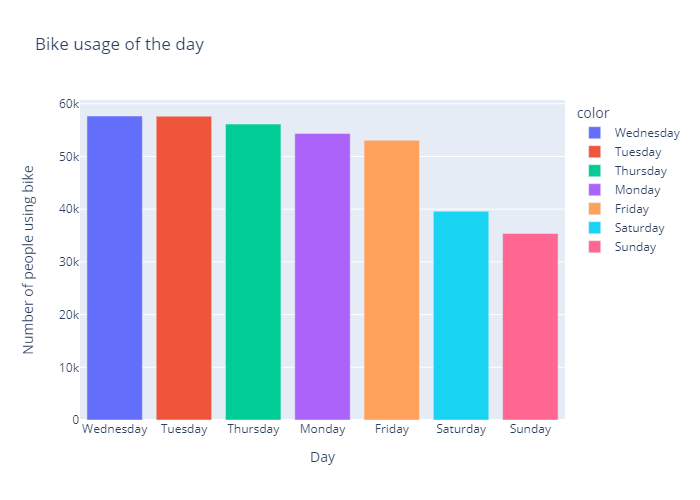

In [44]:
fig = px.bar(x=tripdata["end_day"].value_counts().index,
       y=tripdata["end_day"].value_counts().values,
       color=tripdata["end_day"].value_counts().index,
       title = "Bike usage of the day",
       labels={'x':'Day',"y":"Number of people using bike"})
fig.show("png")

### Peak month of the year

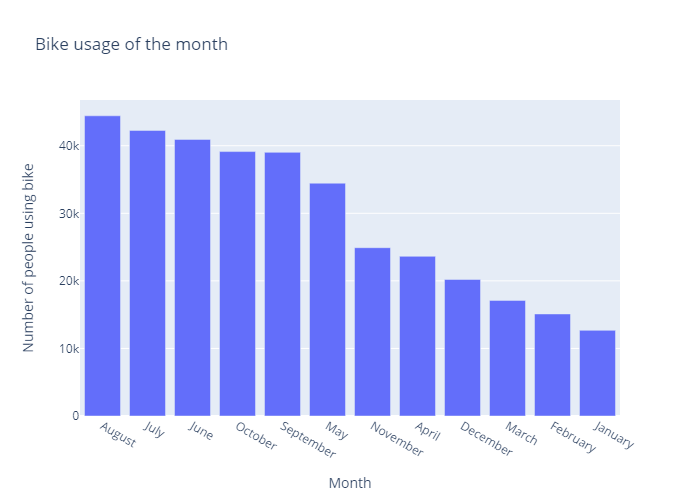

In [45]:
fig = px.bar(x=tripdata["start_month"].value_counts().index,
       y=tripdata["start_month"].value_counts().values,
       title = "Bike usage of the month",
       labels={'x':'Month',"y":"Number of people using bike"})
fig.show("png")

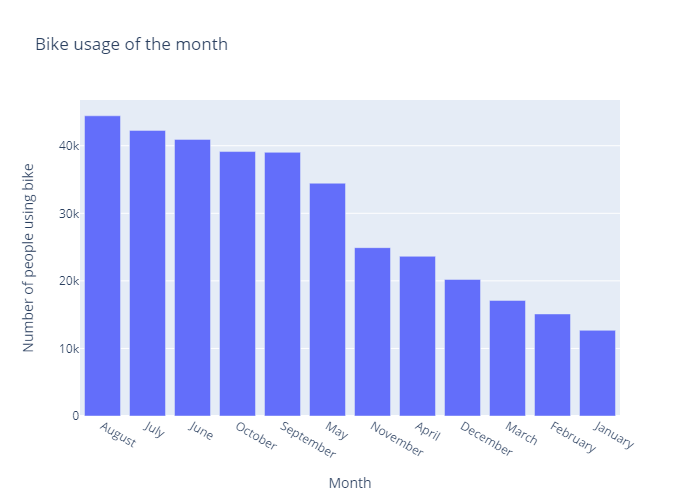

In [46]:
fig = px.bar(x=tripdata["end_month"].value_counts().index,
       y=tripdata["end_month"].value_counts().values,
       title = "Bike usage of the month",
       labels={'x':'Month',"y":"Number of people using bike"})
fig.show("png")


### Peak season of the year 

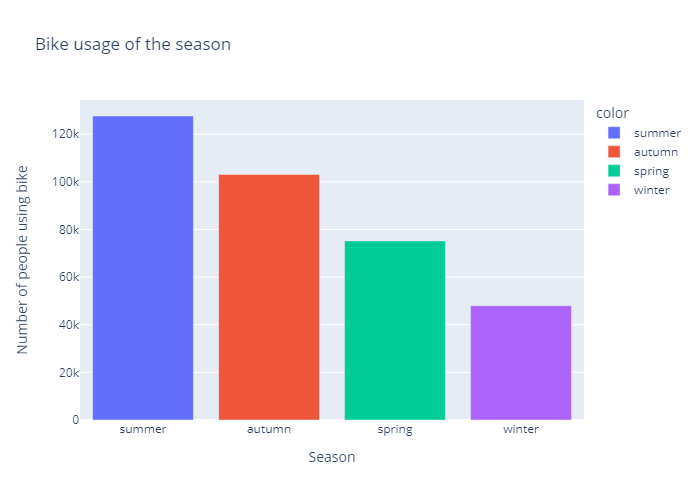

In [47]:
fig = px.bar(x=tripdata["seasons"].value_counts().index,
       y=tripdata["seasons"].value_counts().values,
       color=tripdata["seasons"].value_counts().index,
       title = "Bike usage of the season",
       labels={'x':'Season',"y":"Number of people using bike"})

fig.show("png")

In [48]:
tripdata.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'dist', 'year', 'month', 'day', 'start_hour',
       'start_minute', 'end_hour', 'send_minute', 'start_month', 'end_month',
       'start_day', 'end_day', 'date', 'holiday', 'datetime', 'tempmax',
       'tempmin', 'temp', 'dew', 'humidity', 'snow', 'snowdepth', 'windspeed',
       'visibility', 'solarradiation', 'cloudcover', 'conditions',
       'description', 'seasons', 'birthyear', 'Years_old', 'Age_group'],
      dtype='object')

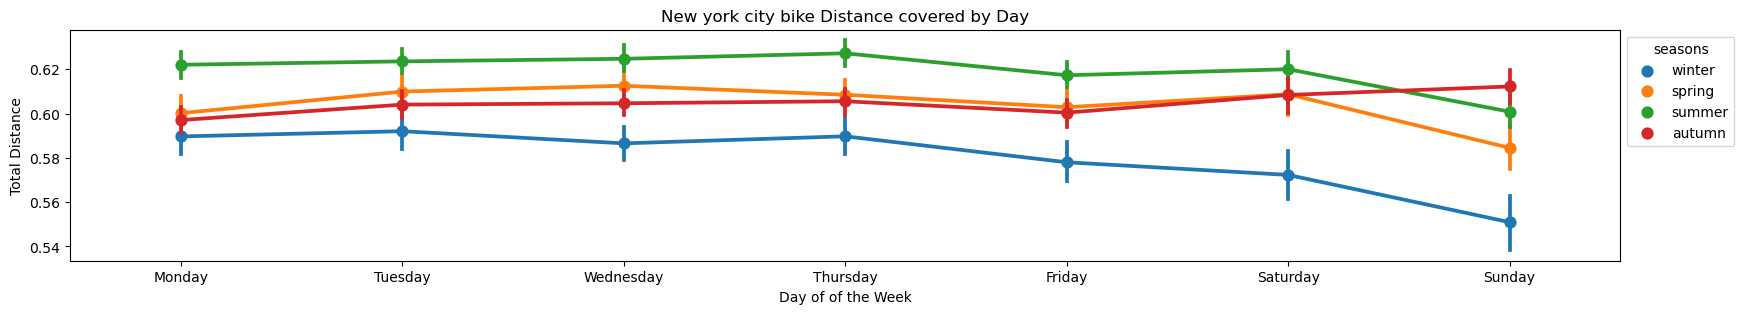

In [49]:
plt.rcParams["figure.figsize"] = (20,3)
fig, ax = plt.subplots()
sns.pointplot(data=tripdata[['day', 'dist', 'seasons']],
              x='day',
              y='dist',
              hue='seasons',
              ax=ax)

plt.title('New york city bike Distance covered by Day')
plt.ylabel('Total Distance')
plt.xlabel('Day of of the Week')

leg_handles = ax.get_legend_handles_labels()[0]
ax.legend(leg_handles, ['winter', 'spring', 'summer', 'autumn'], title='seasons', bbox_to_anchor=(1, 1), loc=2)

plt.show()

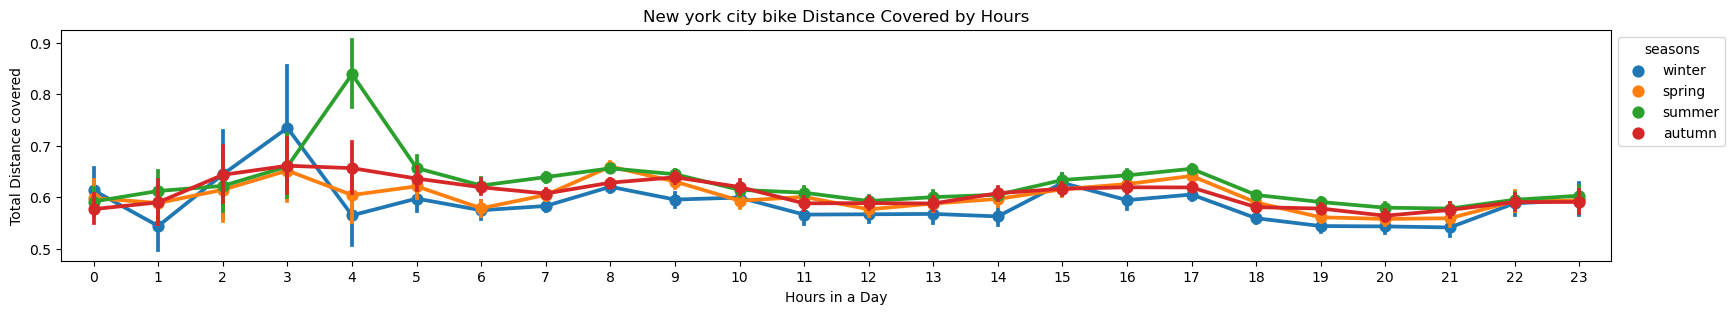

In [51]:
plt.rcParams["figure.figsize"] = (20,3)
fig, ax = plt.subplots()
sns.pointplot(data=tripdata[['start_hour', 'dist', 'seasons']],
              x='start_hour',
              y='dist',
              hue='seasons',
              ax=ax)

plt.title('New york city bike Distance Covered by Hours')
plt.ylabel('Total Distance covered')
plt.xlabel('Hours in a Day')

leg_handles = ax.get_legend_handles_labels()[0]
ax.legend(leg_handles, ['winter', 'spring', 'summer', 'autumn'], title='seasons', bbox_to_anchor=(1, 1), loc=2)

plt.show()

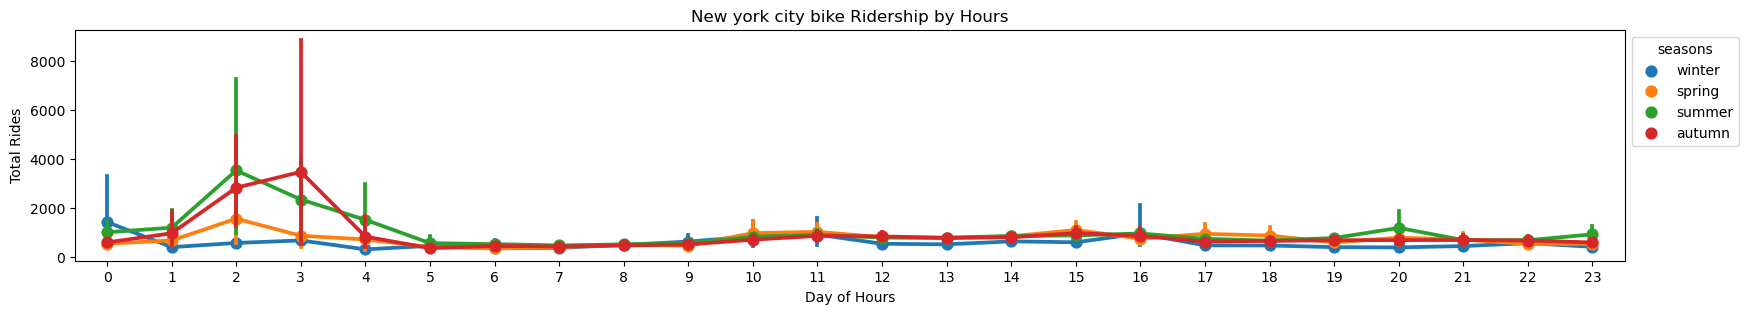

In [52]:
plt.rcParams["figure.figsize"] = (20,3)
fig, ax = plt.subplots()
sns.pointplot(data=tripdata[['start_hour', 'tripduration', 'seasons']],
              x='start_hour',
              y='tripduration',
              hue='seasons',
              ax=ax)

plt.title('New york city bike Ridership by Hours')
plt.ylabel('Total Rides')
plt.xlabel('Day of Hours')

leg_handles = ax.get_legend_handles_labels()[0]
ax.legend(leg_handles, ['winter', 'spring', 'summer', 'autumn'], title='seasons', bbox_to_anchor=(1, 1), loc=2)

plt.show()

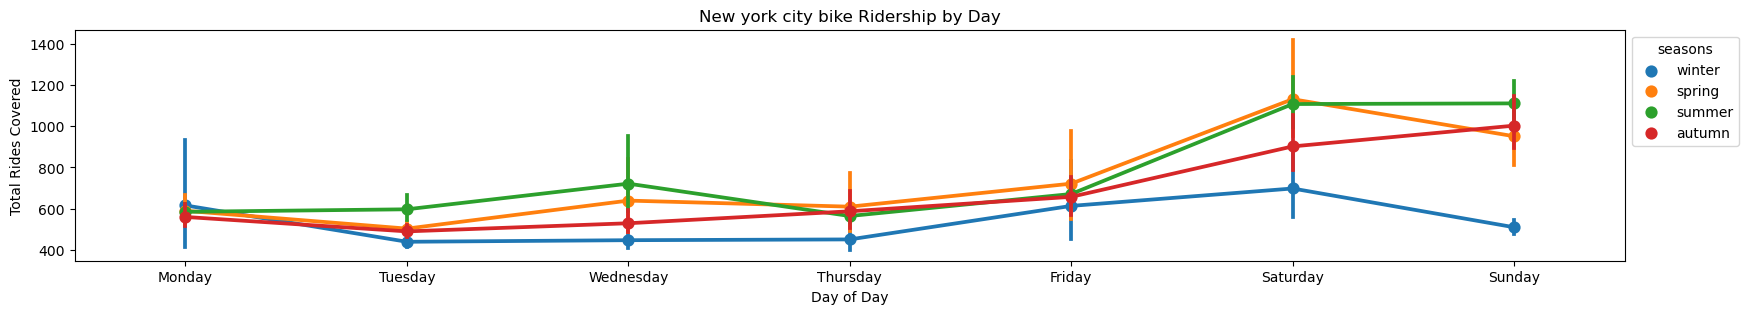

In [53]:
plt.rcParams["figure.figsize"] = (20,3)
fig, ax = plt.subplots()
sns.pointplot(data=tripdata[['start_day', 'tripduration', 'seasons']],
              x='start_day',
              y='tripduration',
              hue='seasons',
              ax=ax)

plt.title('New york city bike Ridership by Day')
plt.ylabel('Total Rides Covered')
plt.xlabel('Day of Day')

leg_handles = ax.get_legend_handles_labels()[0]
ax.legend(leg_handles, ['winter', 'spring', 'summer', 'autumn'], title='seasons', bbox_to_anchor=(1, 1), loc=2)

plt.show()

In [55]:
tripdata['Age_group'].unique()

['20-29', '40-49', '65+', '30-39', '50-59', '60-64', '<20']
Categories (7, object): ['<20' < '20-29' < '30-39' < '40-49' < '50-59' < '60-64' < '65+']

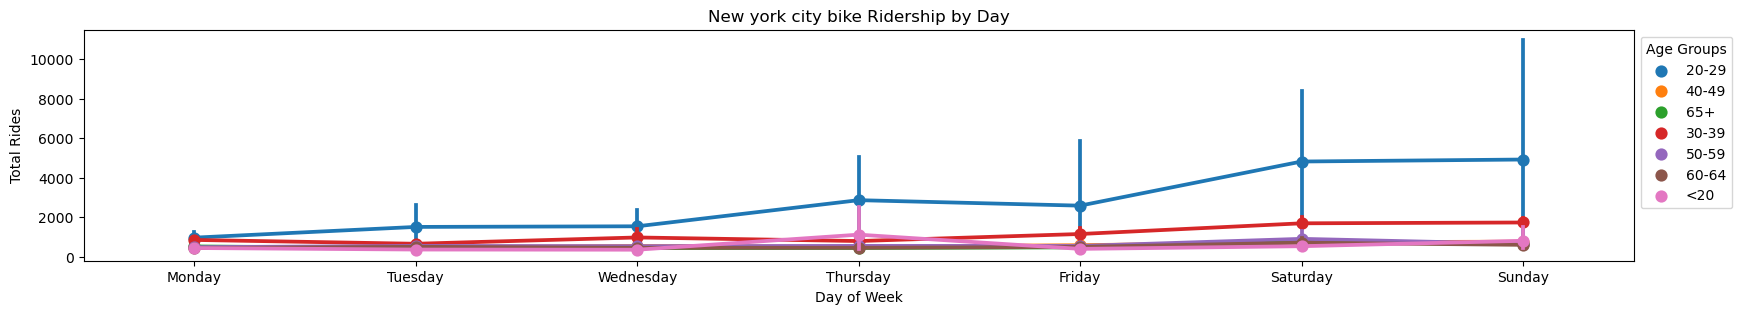

In [54]:
plt.rcParams["figure.figsize"] = (20,3)
fig, ax = plt.subplots()
sns.pointplot(data=tripdata[['tripduration', 'start_day', 'Age_group']],
              x='start_day',
              y='tripduration',
              hue='Age_group',
              ax=ax)

plt.title('New york city bike Ridership by Day')
plt.ylabel('Total Rides')
plt.xlabel('Day of Week')

leg_handles = ax.get_legend_handles_labels()[0]
ax.legend(leg_handles, ['20-29', '40-49', '65+', '30-39', '50-59', '60-64', '<20'], title='Age Groups', bbox_to_anchor=(1, 1), loc=2)

plt.show()

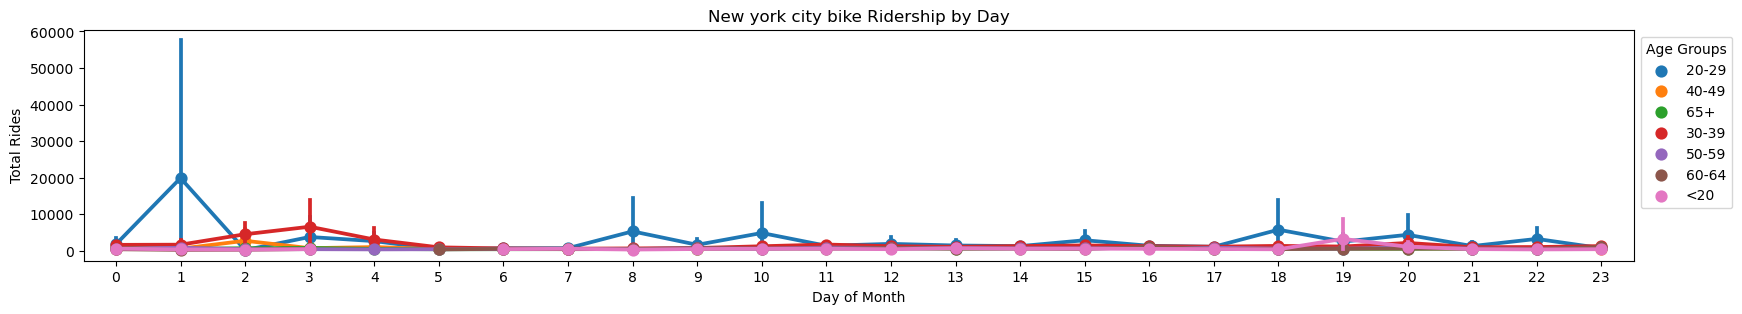

In [56]:
plt.rcParams["figure.figsize"] = (20,3)
fig, ax = plt.subplots()
sns.pointplot(data=tripdata[['tripduration', 'start_hour', 'Age_group']],
              x='start_hour',
              y='tripduration',
              hue='Age_group',
              ax=ax)

plt.title('New york city bike Ridership by Day')
plt.ylabel('Total Rides')
plt.xlabel('Day of Month')

leg_handles = ax.get_legend_handles_labels()[0]
ax.legend(leg_handles, ['20-29', '40-49', '65+', '30-39', '50-59', '60-64', '<20'], title='Age Groups', bbox_to_anchor=(1, 1), loc=2)

plt.show()

### when do bike used most holidays or no holidays?

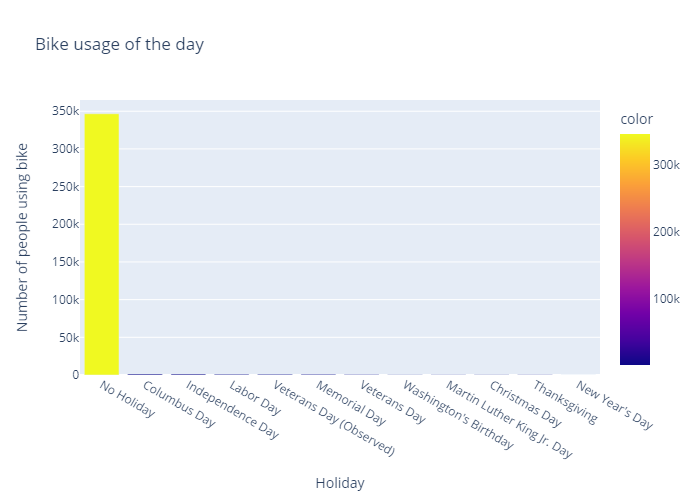

In [57]:
fig = px.bar(x=tripdata["holiday"].value_counts().index,
       y=tripdata["holiday"].value_counts().values,
       color=tripdata["holiday"].value_counts().values,
       title = "Bike usage of the day",
       labels={'x':'Holiday',"y":"Number of people using bike"})
fig.show("png")

We can conclude that 
1. morning 8am and evening 5-6 pm during and after work used most
2. weekdays people used more than weekends
3. During summer season of month june-july-August used most than winter
4. During non holidays bike usage counted high than holidays.

### Explore data on stations

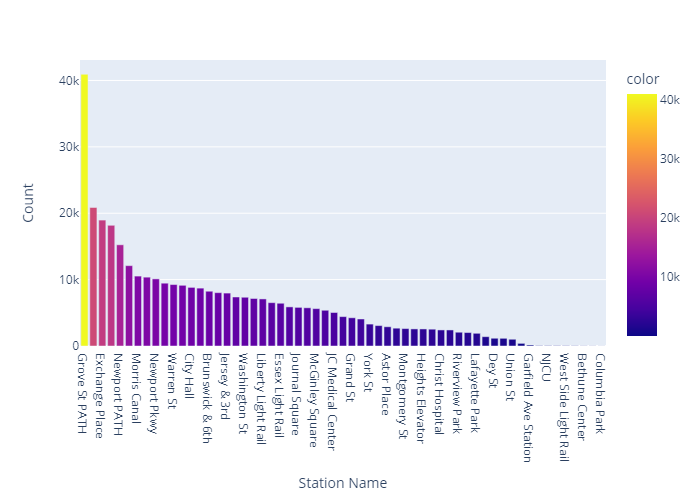

In [58]:
fig = px.bar(x=tripdata["start station name"].value_counts().index,
       y=tripdata["start station name"].value_counts().values,
       color=tripdata["start station name"].value_counts().values,
       labels={'x':'Station Name',"y":"Count"})
fig.show("png")

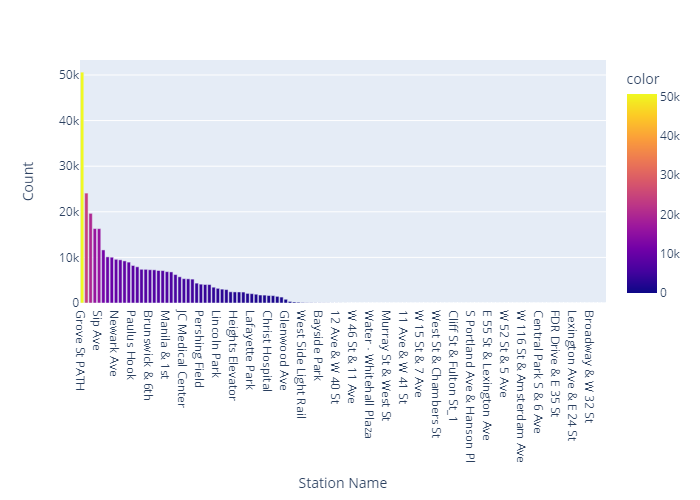

In [59]:
fig = px.bar(x=tripdata["end station name"].value_counts().index,
       y=tripdata["end station name"].value_counts().values,
       color=tripdata["end station name"].value_counts().values,
       labels={'x':'Station Name',"y":"Count"})
fig.show("png")

Grove St Path is the most used station than other stations and some of the stations no single trip is being recorded

## visualization of the famous routes

In [60]:
trips_df = pd.DataFrame()
trips_df = tripdata.groupby(['start station name','end station name']).size().reset_index(name = 'Number of Trips')
trips_df = trips_df.sort_values('Number of Trips',ascending = False)
trips_df["start station name"] = trips_df["start station name"].astype(str)
trips_df["end station name"] = trips_df["end station name"].astype(str)
trips_df["Routes"] = trips_df["start station name"] + " to " + trips_df["end station name"]
trips_df = trips_df[:10]
trips_df = trips_df.reset_index()
trips_df

,index,start station name,end station name,Number of Trips,Routes
0,1008,Hamilton Park,Grove St PATH,7874,Hamilton Park to Grove St PATH
1,955,Grove St PATH,Hamilton Park,5871,Grove St PATH to Hamilton Park
2,1937,Morris Canal,Exchange Place,4604,Morris Canal to Exchange Place
3,239,Brunswick & 6th,Grove St PATH,4265,Brunswick & 6th to Grove St PATH
4,1364,Jersey & 6th St,Grove St PATH,4135,Jersey & 6th St to Grove St PATH
5,292,Brunswick St,Grove St PATH,3989,Brunswick St to Grove St PATH
6,740,Exchange Place,Morris Canal,3319,Exchange Place to Morris Canal
7,610,Dixon Mills,Grove St PATH,3280,Dixon Mills to Grove St PATH
8,1733,Marin Light Rail,Grove St PATH,3216,Marin Light Rail to Grove St PATH
9,2491,Van Vorst Park,Grove St PATH,3177,Van Vorst Park to Grove St PATH


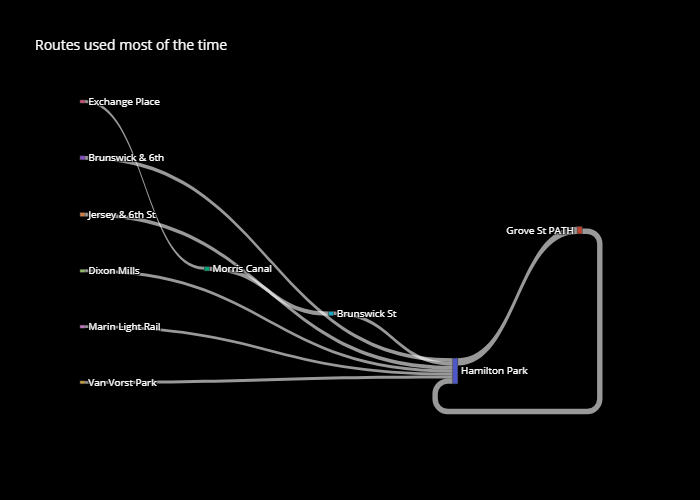

In [61]:
label = ["Hamilton Park", "Grove St PATH", "Morris Canal", "Brunswick & 6th", 
         "Jersey & 6th St", "Brunswick St", "Exchange Place", "Dixon Mills",
         "Marin Light Rail", "Van Vorst Park", "Grove St PATH", "Hamilton Park", 
         "Exchange Place", "Grove St PATH"," Grove St PATH", "Grove St PATH", 
         "Morris Canal", "Grove St PATH", "Grove St PATH"," Grove St PATH"]

source = [0,1,2,3,4,5,6,7,8,9]
target = [1, 0, 5, 0, 0, 0, 2, 0, 0, 0 ]
value = [7874, 5871, 4604, 4265, 4135, 3989, 3319, 3280, 3216, 3177]

link = dict(source = source, target = target, value = value)
node = dict(label = label, pad=50, thickness=5)
data = go.Sankey(link = link, node=node)



fig = go.Figure(data)
fig.update_layout(
    
    title="Routes used most of the time",
    font=dict(size = 10, color = 'white'),
    plot_bgcolor='black',
    paper_bgcolor='black'
)
fig.show("png")

## Based on the above analysis, Hamilton Park to Grove St PATH is the most popular route

In [62]:
bike_use_df = pd.DataFrame()
bike_use_df = tripdata.groupby(['bikeid']).size().reset_index(name = 'Number of Times Used')
bike_use_df = bike_use_df.sort_values('Number of Times Used', ascending = False)
bike_use_df = bike_use_df[:10]
bike_use_df['bikeid'] = bike_use_df['bikeid'].astype(str)
bike_use_df['bikeid'] = ('Bike ' + bike_use_df['bikeid'])
bike_use_df = bike_use_df.reset_index()
bike_use_df.head()

,index,bikeid,Number of Times Used
0,71,Bike 26155,873
1,201,Bike 26288,854
2,518,Bike 29586,842
3,530,Bike 29598,836
4,540,Bike 29608,833


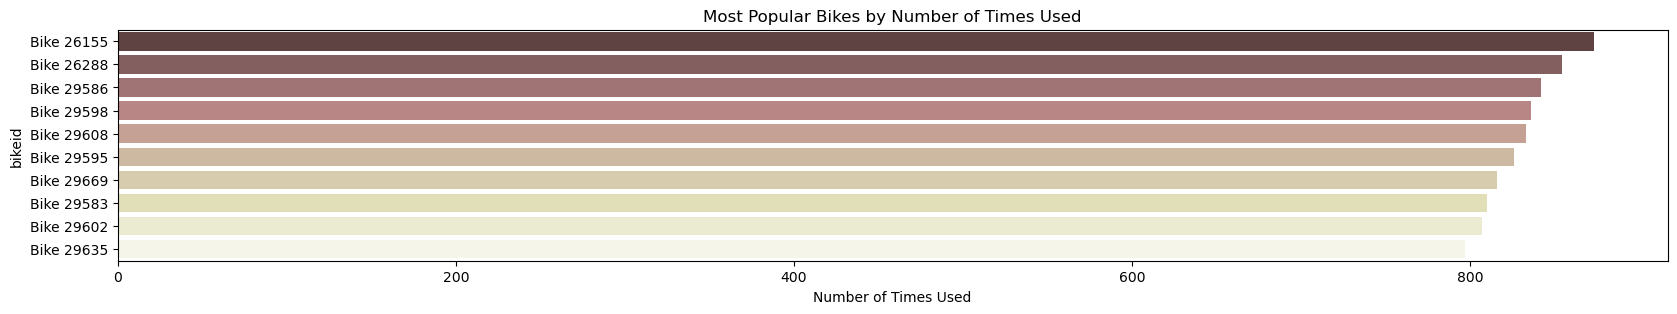

In [63]:
ax8 = sns.barplot('Number of Times Used', 'bikeid',data = bike_use_df, palette="pink")
ax8.set_title('Most Popular Bikes by Number of Times Used')
plt.show()


In [64]:
### Find most common start and end routes 
import folium
df_sub = tripdata[['start station name','end station name', 'start station latitude','start station longitude','end station latitude','end station longitude']]
df_sub['both'] = df_sub['start station name'] + ', ' + df_sub['end station name']
df_sub = df_sub.groupby(['start station name','end station name', 'start station latitude','start station longitude','end station latitude','end station longitude'])['both'].count().reset_index(name='Counts of trips')

df_sub = df_sub.nsmallest(100, columns=['Counts of trips'])
df_sub

,start station name,end station name,start station latitude,start station longitude,end station latitude,end station longitude,Counts of trips
9,5 Corners Library,Communipaw & Berry Lane,40.734961,-74.059503,40.714358,-74.066611,1
23,5 Corners Library,JCBS Depot,40.734961,-74.059503,40.709651,-74.068601,1
51,Astor Place,6 Ave & W 33 St,40.719282,-74.071262,40.749013,-73.988484,1
54,Astor Place,Barrow St & Hudson St,40.719282,-74.071262,40.731724,-74.006744,1
56,Astor Place,Broadway & Battery Pl,40.719282,-74.071262,40.704633,-74.013617,1
...,...,...,...,...,...,...,...
901,Grand St,Jackson Square,40.715178,-74.037683,40.711130,-74.078900,1
922,Grand St,S Portland Ave & Hanson Pl,40.715178,-74.037683,40.685396,-73.974315,1
923,Grand St,Sip Ave,40.715178,-74.037683,40.730743,-74.063784,1
924,Grand St,South End Ave & Liberty St,40.715178,-74.037683,40.711512,-74.015756,1


### Explore weather data

In [65]:
tripdata.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'dist', 'year', 'month', 'day', 'start_hour',
       'start_minute', 'end_hour', 'send_minute', 'start_month', 'end_month',
       'start_day', 'end_day', 'date', 'holiday', 'datetime', 'tempmax',
       'tempmin', 'temp', 'dew', 'humidity', 'snow', 'snowdepth', 'windspeed',
       'visibility', 'solarradiation', 'cloudcover', 'conditions',
       'description', 'seasons', 'birthyear', 'Years_old', 'Age_group'],
      dtype='object')

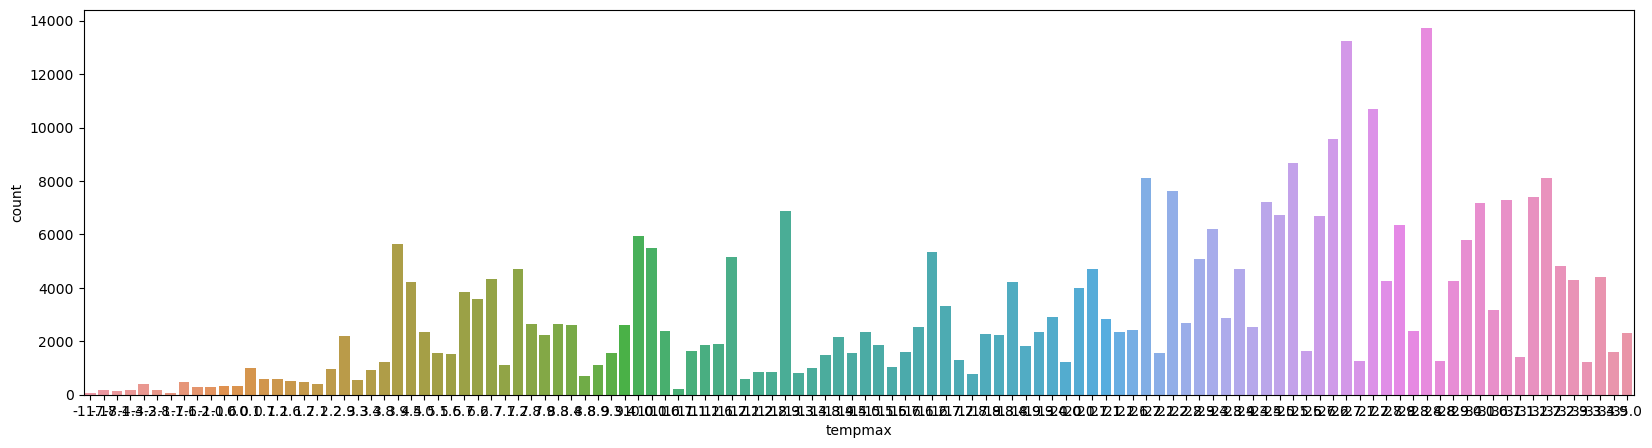

In [66]:
plt.figure(figsize = (20,5))
sns.countplot(tripdata["tempmax"])
plt.show()

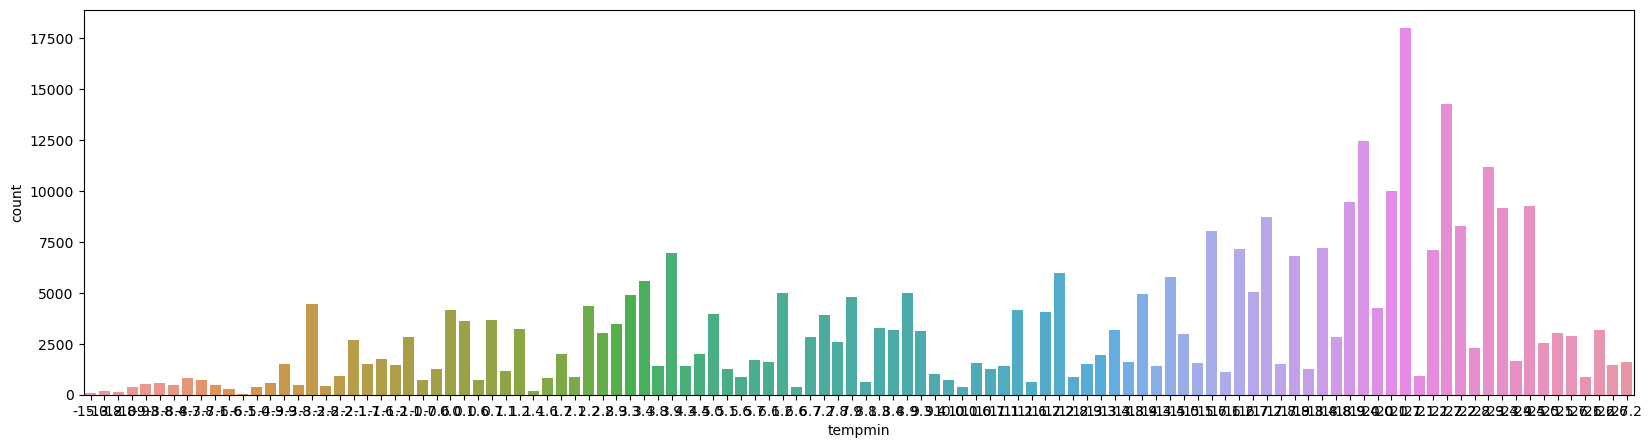

In [67]:
plt.figure(figsize = (20,5))
sns.countplot(tripdata["tempmin"])
plt.show()

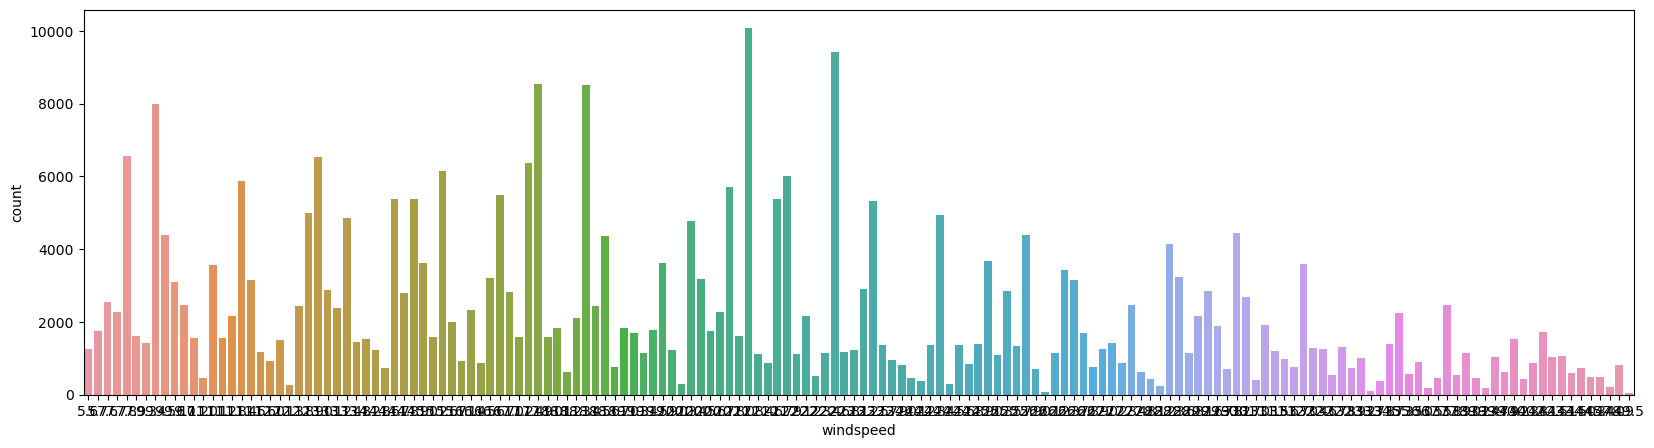

In [68]:
plt.figure(figsize = (20,5))
sns.countplot(tripdata["windspeed"])
plt.show()

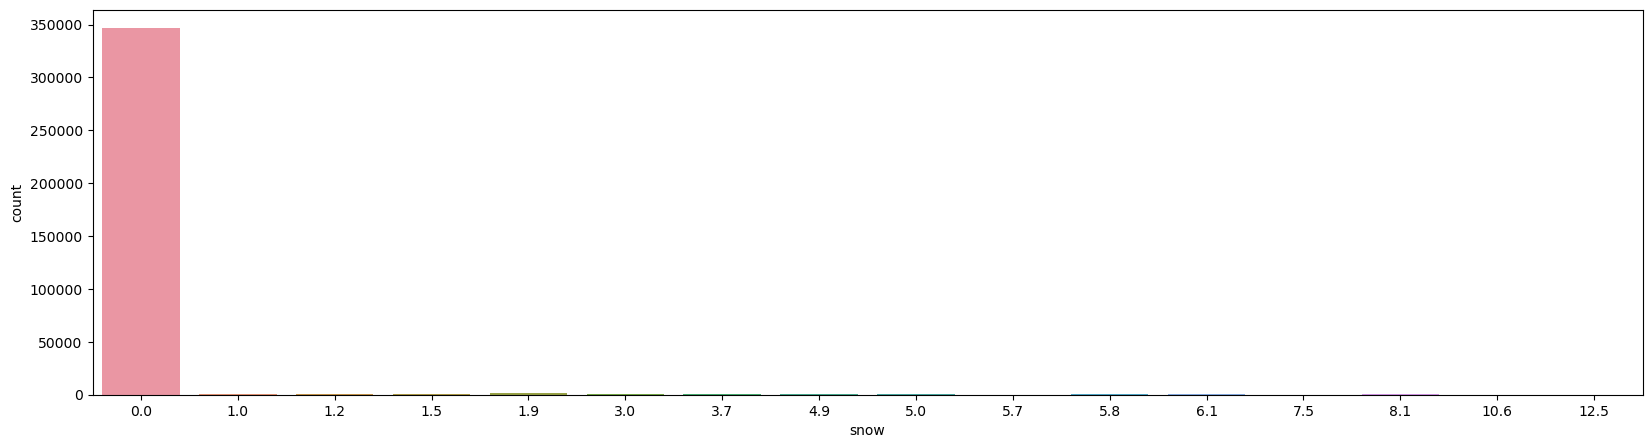

In [69]:
plt.figure(figsize = (20,5))
sns.countplot(tripdata["snow"])
plt.show()

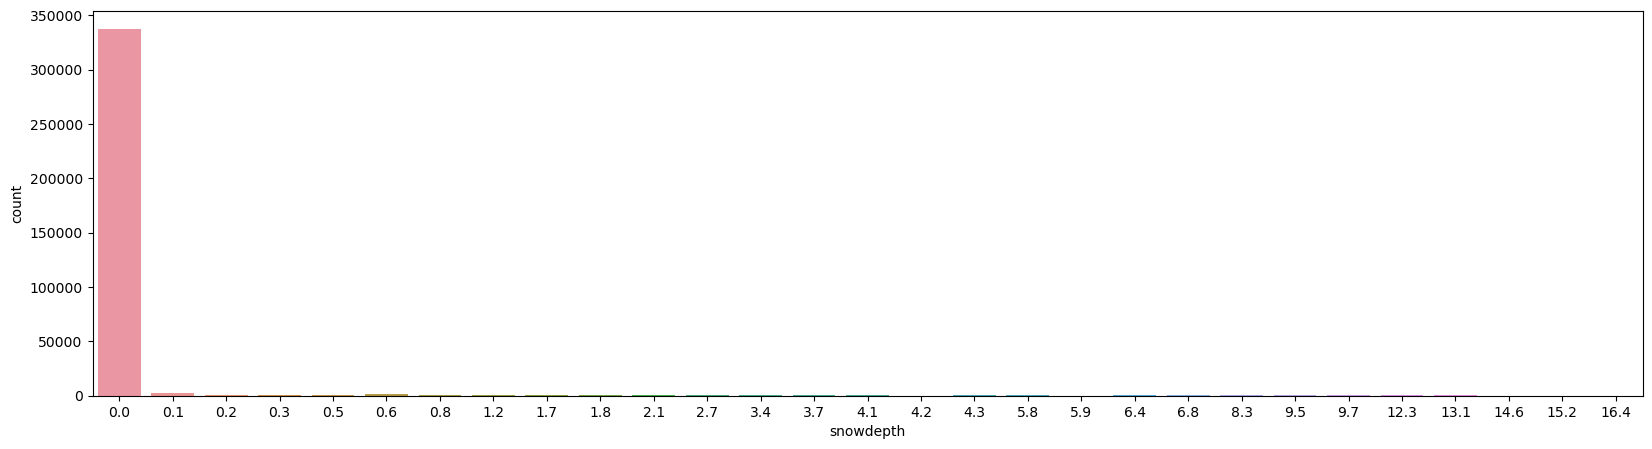

In [70]:
plt.figure(figsize = (20,5))
sns.countplot(tripdata["snowdepth"])
plt.show()

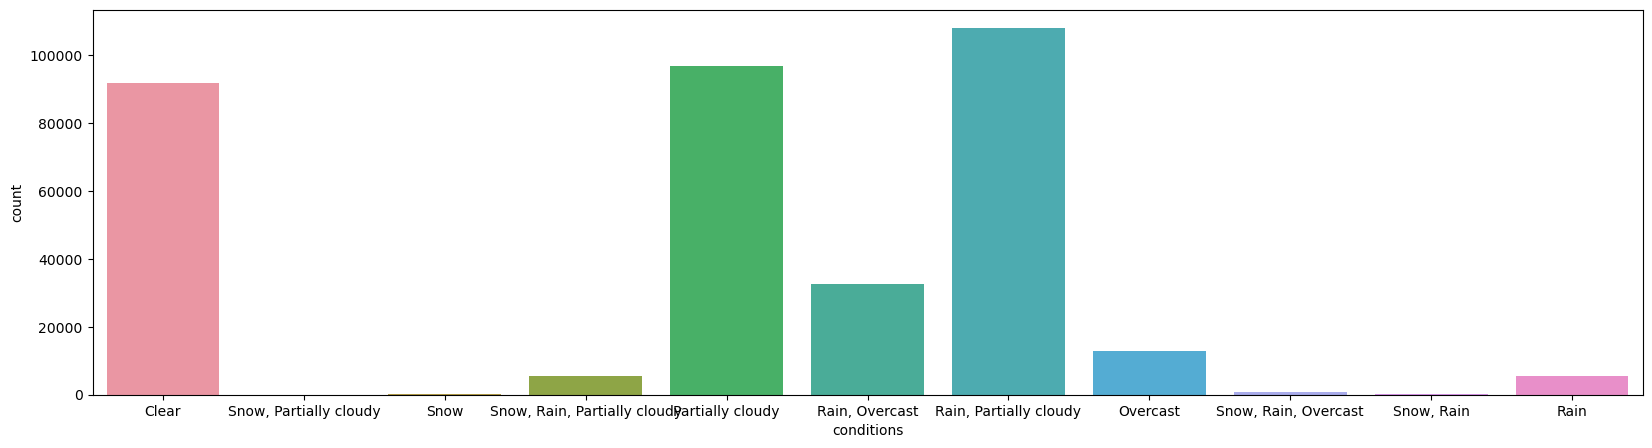

In [71]:
plt.figure(figsize = (20,5))
sns.countplot(tripdata["conditions"])
plt.show()

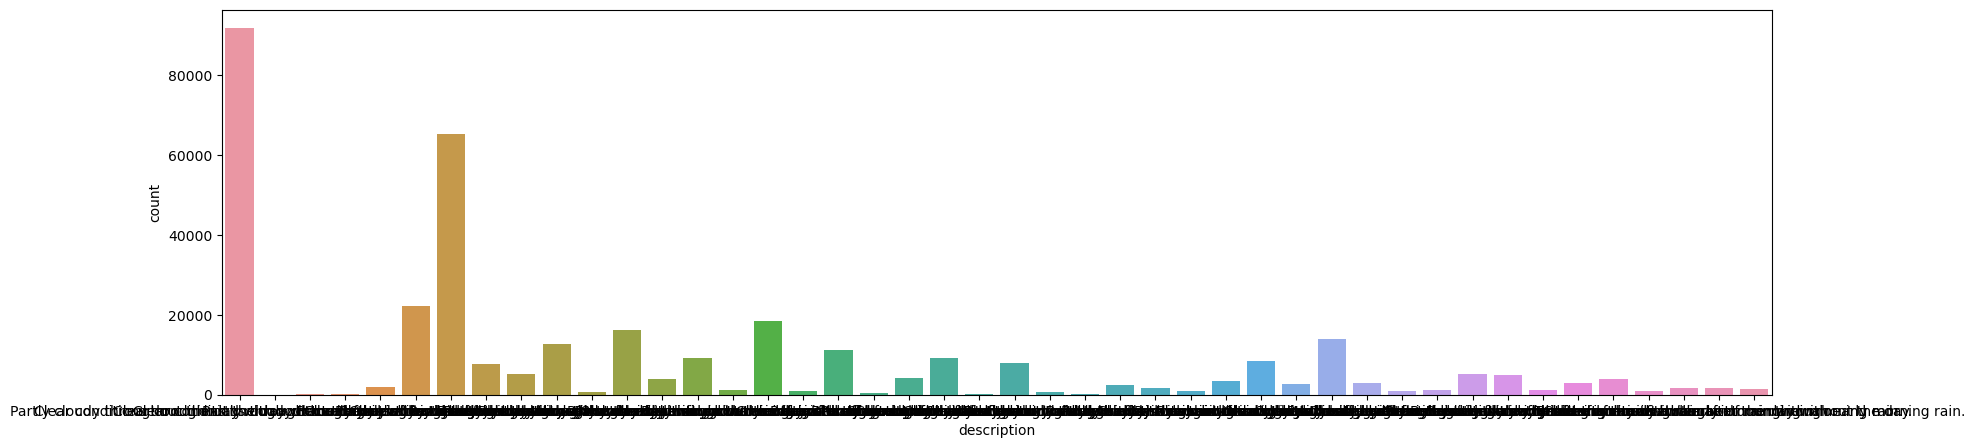

In [72]:
plt.figure(figsize = (20,5))
sns.countplot(tripdata["description"])
plt.show()

<AxesSubplot:xlabel='dist'>

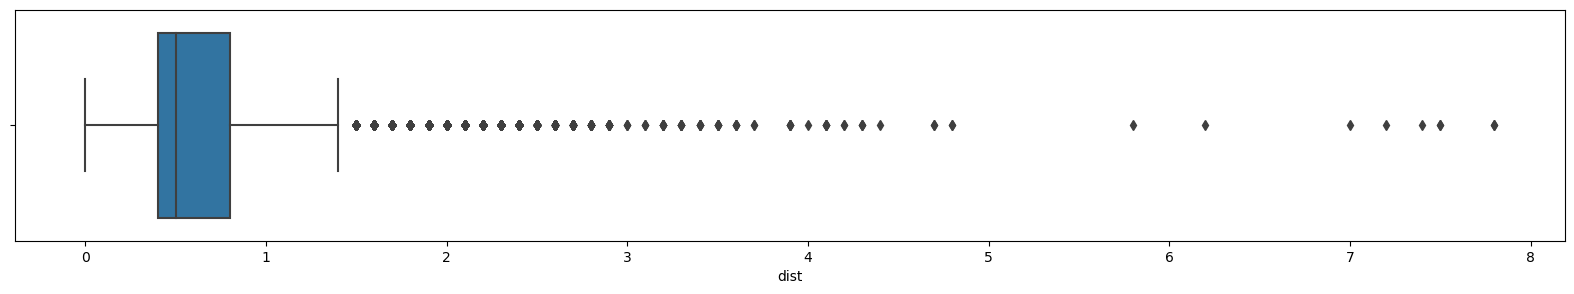

In [73]:
sns.boxplot(x=tripdata["dist"])

<AxesSubplot:xlabel='humidity'>

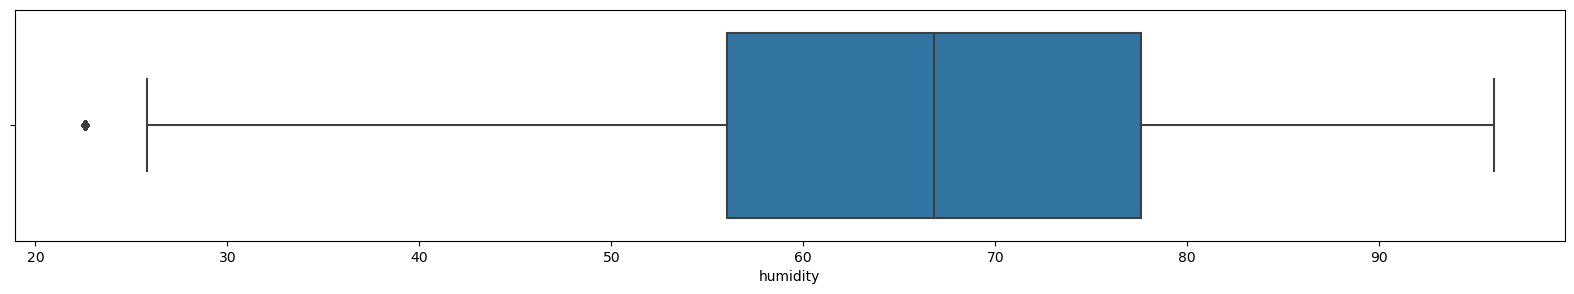

In [74]:
sns.boxplot(x=tripdata["humidity"])

<AxesSubplot:xlabel='birth year'>

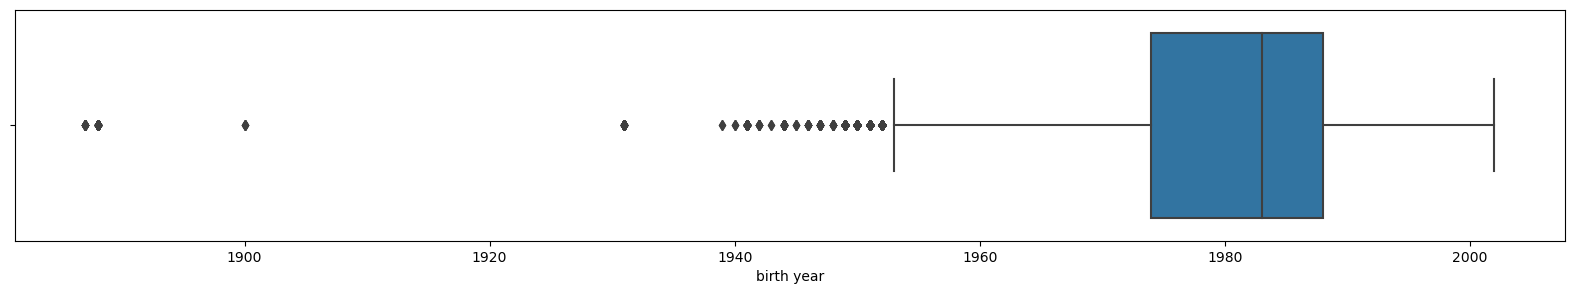

In [75]:
sns.boxplot(x=tripdata["birth year"])

In [2]:
sns.boxplot(x=tripdata["tripduration"])

NameError: name 'sns' is not defined

<AxesSubplot:xlabel='birth year', ylabel='day'>

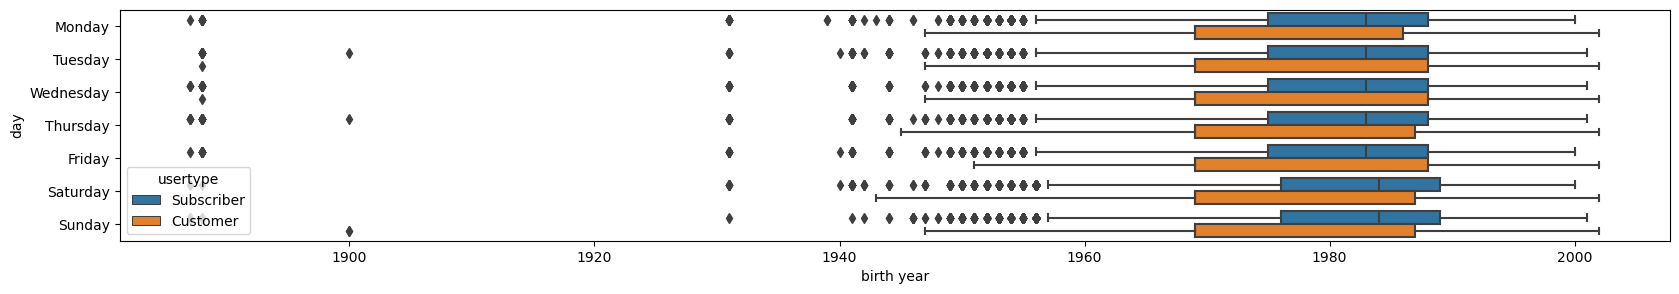

In [76]:
sns.boxplot(data=tripdata, x="birth year", y="day", hue="usertype")

<AxesSubplot:xlabel='dist', ylabel='month'>

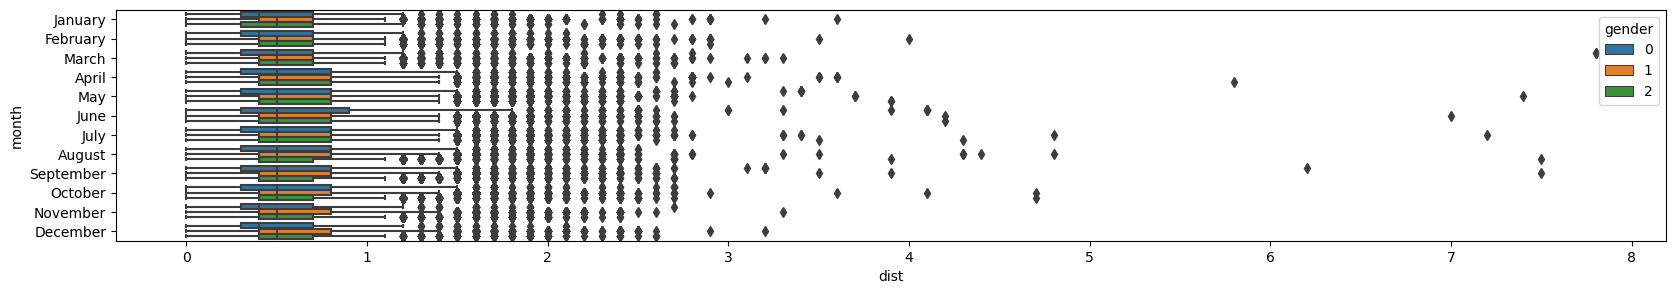

In [77]:
sns.boxplot(data=tripdata, x="dist", y="month", hue="gender")

### Exploratory Data Analayis

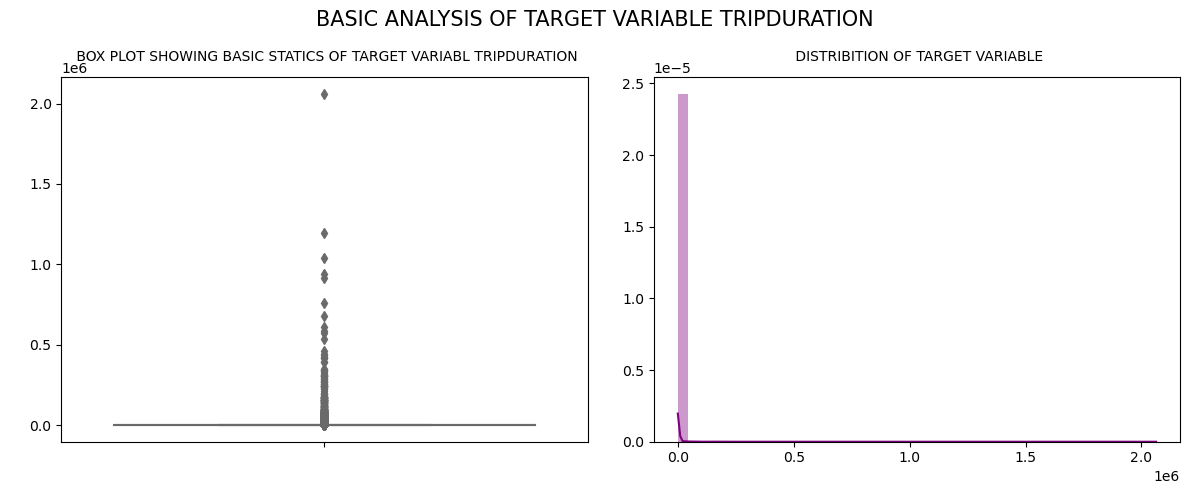

In [96]:
## Traget Variable tripduration
fig, ax = plt.subplots(nrows=1,ncols=2,figsize= (12,5))
fig.suptitle('Basic analysis of target variable tripduration'.upper(), fontsize=15)
sns.boxplot(y=tripdata['tripduration'], ax=ax[0], palette='Purples')
ax[0].set_title(" box plot showing basic statics of target variabl tripduration".upper(), fontsize=10, fontweight=10, y=1.02)
ax[0].set_xlabel(' ')
ax[0].set_ylabel(' ')

sns.distplot(tripdata['tripduration'], ax=ax[1] , color="purple")
ax[1].set_title(" Distribition of target variable".upper(), fontsize=10, fontweight=10, y=1.02)
ax[1].set_xlabel(' ')
ax[1].set_ylabel(' ')
plt.tight_layout()
plt.show()

